# COVID-19 cases in Poços de Caldas

A repo for coronavirus related case count data from Poços de Caldas, MG, Brazil.

In [4]:
import pandas as pd
from matplotlib.dates import DateFormatter
from os import path
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import_from_web = False

# get data from the Healthy Department of the State of Minas Gerais
if import_from_web:
    try:
        df = pd.read_csv('https://www.saude.mg.gov.br/images/noticias_e_eventos/000_2020/coronavirus-dados-csv/notificacoes-covid19-mg.csv',
                         encoding = "ISO-8859-1",
                         dayfirst=True, 
                         sep=';',
                         parse_dates =['DATA_NOTIFICACAO', 'DATA_ATUALIZACAO']
                        )
        df.to_csv(path.join('data', 'notificacoes-covid19-mg.csv'))
        
    except:
        print('Error: unable to update the file.')


df = pd.read_csv(path.join('data', 'notificacoes-covid19-mg.csv'),
                     dayfirst=True,
                     parse_dates =['DATA_NOTIFICACAO', 'DATA_ATUALIZACAO']
                    )

# filtering the data related to Poços de Caldas
city = 'POÇOS DE CALDAS'
df_city = df[df['MUNICIPIO_RESIDENCIA'] == city].sort_values(by=['DATA_NOTIFICACAO']).reset_index().drop(['index'], axis=1)

## Confirmed Cases - State Dataset

In [5]:
# organizing the data
df_conf = df_city['DATA_NOTIFICACAO'].value_counts().rename_axis(['DATA_NOTIFICACAO']).reset_index(name='NOVOS_CASOS').sort_values('DATA_NOTIFICACAO')
df_conf = df_conf.reset_index().drop(['index'], axis=1)

# add cumulative cases column
df_conf['CONFIRMADOS'] = df_conf['NOVOS_CASOS'].cumsum()

# exporting a csv file
df_conf.to_csv(path.join('data', 'PC-COVID19-Total-Confirmed-Cases.csv'))

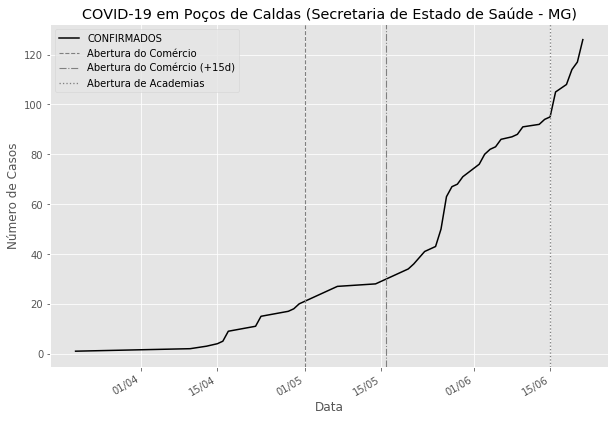

In [6]:
plt_conf = df_conf.plot.line(x='DATA_NOTIFICACAO',y='CONFIRMADOS',color="black",
                                              figsize=(10,7))

plt_conf.axvline("2020-05-01",label='Abertura do Comércio',  color="gray", lw=1.1, linestyle="--")
plt_conf.axvline("2020-05-16",label='Abertura do Comércio (+15d)', color="gray", lw=1.1, linestyle="-.")
plt_conf.axvline("2020-06-15",label='Abertura de Academias', color="gray", lw=1.3, linestyle=":")

plt_conf.xaxis.set_major_formatter(DateFormatter('%d/%m'))
plt_conf.set_ylabel("Número de Casos")
plt_conf.set_xlabel("Data")
plt_conf.set_title("COVID-19 em Poços de Caldas (Secretaria de Estado de Saúde - MG)")
plt_conf.legend()
plt_conf.get_figure().savefig(path.join('results','graph_confirmed_cases.png'), bbox_inches='tight')

## Confirmed Cases - State Dataset

In [10]:

df_bol = pd.read_csv(path.join('data', 'PC_boletins_data.csv'),
                     dayfirst=True,
                     parse_dates =['Data']
                    )

#df_bol = df_bol[df_bol['Confirmados']>0]

df_bol['Infectados'] = df_bol['Confirmados']-df_bol['Recuperados']-df_bol['Óbitos']
df_bol['Novos Confirmados'] = df_bol['Confirmados']-df_bol['Confirmados'].shift()
df_bol['Novos Recuperados'] = df_bol['Recuperados']-df_bol['Recuperados'].shift()
df_bol['Novos Óbitos'] = df_bol['Óbitos']-df_bol['Óbitos'].shift()


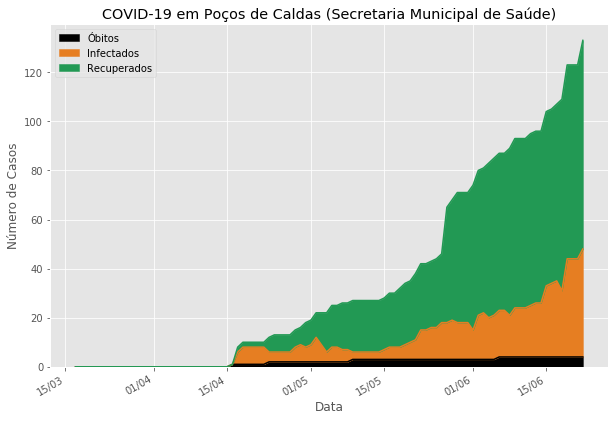

In [11]:
plt_bol = df_bol.plot.area(x='Data',y=['Óbitos','Infectados','Recuperados'],
                           color=["black","#E67E22","#229954"],
                           figsize=(10,7))

plt_bol.xaxis.set_major_formatter(DateFormatter('%d/%m'))
plt_bol.set_ylabel("Número de Casos")
plt_bol.set_xlabel("Data")
plt_bol.set_title("COVID-19 em Poços de Caldas (Secretaria Municipal de Saúde)")
plt_bol.legend()
plt_bol.get_figure().savefig('results/covid_cases_area_plot.png')

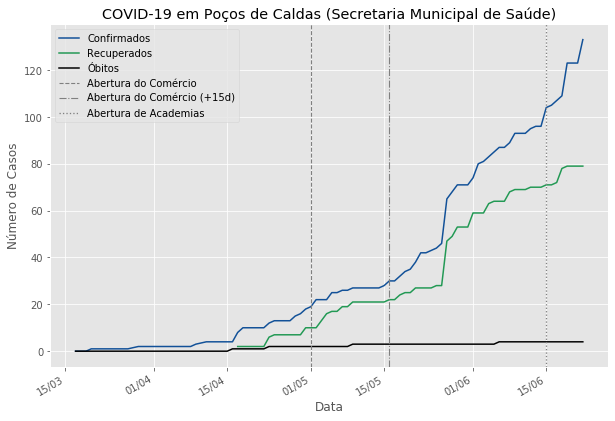

In [9]:
plt_bol = df_bol.plot.line(x='Data',y=['Confirmados','Recuperados','Óbitos'],color=["#125198","#229954","black"],
                                              figsize=(10,7))


plt_bol.axvline("2020-05-01",label='Abertura do Comércio',  color="gray", lw=1.1, linestyle="--")
plt_bol.axvline("2020-05-16",label='Abertura do Comércio (+15d)', color="gray", lw=1.1, linestyle="-.")
plt_bol.axvline("2020-06-15",label='Abertura de Academias', color="gray", lw=1.3, linestyle=":")

plt_bol.xaxis.set_major_formatter(DateFormatter('%d/%m'))
plt_bol.set_ylabel("Número de Casos")
plt_bol.set_xlabel("Data")
plt_bol.set_title("COVID-19 em Poços de Caldas (Secretaria Municipal de Saúde)")
plt_bol.legend()
plt_bol.get_figure().savefig('results/covid_cases_line_plot.png')

In [173]:
df_plt = df_bol.copy() 

df_plt['Data_Rec'] = df_plt[df_plt['Recuperados'].notna()]['Data']

In [174]:
df_plt

,Data,Confirmados,Recuperados,Óbitos,Infectados,Novos Confirmados,Novos Recuperados,Novos Óbitos,Data_Rec
0,2020-03-17,0,NaN,0,NaN,NaN,NaN,NaN,NaT
1,2020-03-18,0,NaN,0,NaN,0.0,NaN,0.0,NaT
2,2020-03-19,0,NaN,0,NaN,0.0,NaN,0.0,NaT
3,2020-03-20,1,NaN,0,NaN,1.0,NaN,0.0,NaT
4,2020-03-21,1,NaN,0,NaN,0.0,NaN,0.0,NaT
...,...,...,...,...,...,...,...,...,...
84,2020-06-14,96,70.0,4,22.0,0.0,0.0,0.0,2020-06-14
85,2020-06-15,104,71.0,4,29.0,8.0,1.0,0.0,2020-06-15
86,2020-06-16,105,71.0,4,30.0,1.0,0.0,0.0,2020-06-16
87,2020-06-17,107,72.0,4,31.0,2.0,1.0,0.0,2020-06-17


In [157]:
df_plt['Recuperados'] = df_plt['Recuperados'].fillna(0)

In [163]:
len(df_plt['Confirmados'])

89

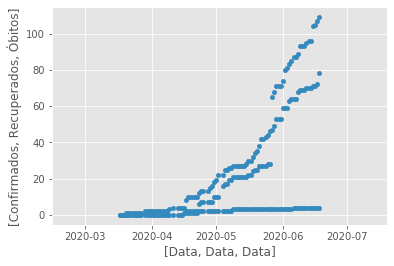

In [181]:
 df_plt.plot.scatter(x=['Data','Data','Data'],y=['Confirmados','Recuperados','Óbitos'])
    
    plt.scatter(t_data,c_data, color='#436EEE',alpha=0.9,s=5))

In [129]:


#.DateFormatter('%d/%m').dt.strftime('%d/%m')

pd.to_datetime(df_bol[condition]['Data'])

28   2020-04-17
29   2020-04-18
30   2020-04-19
31   2020-04-20
32   2020-04-21
        ...    
84   2020-06-14
85   2020-06-15
86   2020-06-16
87   2020-06-17
88   2020-06-18
Name: Data, Length: 61, dtype: datetime64[ns]

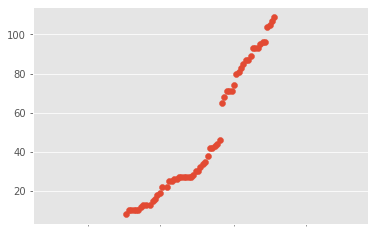

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%d/%m')



fig, ax = plt.subplots()

ax.scatter(x=listaT,y=listaC)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

'''

# round to nearest years.
datemin = np.datetime64(data['date'][0], 'Y')
datemax = np.datetime64(data['date'][-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
'''
plt.show()

28    17/04
29    18/04
30    19/04
31    20/04
32    21/04
      ...  
84    14/06
85    15/06
86    16/06
87    17/06
88    18/06
Name: Data, Length: 61, dtype: object

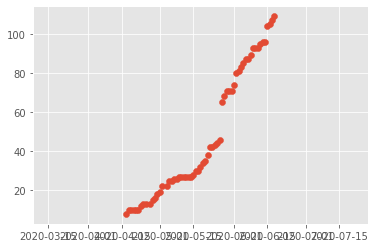

In [143]:
fig, ax = plt.subplots()
ax.scatter(x=listaT,y=listaC)
#ax.xaxis.set_major_formatter(listaT.DateFormatter("%Y-%m"))

listaT.dt.strftime('%d/%m')

In [92]:
ax.set_xticks(df.index)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=90)    

array([1.59263725e+09, 1.59263730e+09, 1.59263735e+09, 1.59263740e+09,
       1.59263746e+09, 1.59263751e+09, 1.59263756e+09, 1.59263761e+09,
       1.59263767e+09, 1.59263772e+09, 1.59263777e+09, 1.59263782e+09,
       1.59263788e+09, 1.59263793e+09, 1.59263798e+09, 1.59263804e+09,
       1.59263809e+09, 1.59263814e+09, 1.59263819e+09, 1.59263825e+09])